In [5]:
import pandas as pd
from prophet import Prophet 
import matplotlib.pyplot as plt 
import yfinance as yf


In [27]:
df = yf.download('EURUSD=X')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [28]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...,...
5175,2023-11-10,1.066758,1.069256,1.065769,1.066758,1.066758,0
5176,2023-11-13,1.069016,1.070549,1.066553,1.069016,1.069016,0
5177,2023-11-14,1.070183,1.086720,1.069359,1.070183,1.070183,0
5178,2023-11-15,1.087831,1.088732,1.083295,1.087831,1.087831,0


In [29]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2003-12-01,1.196501
1,2003-12-02,1.208897
2,2003-12-03,1.212298
3,2003-12-04,1.208094
4,2003-12-05,1.218695
...,...,...
5175,2023-11-10,1.066758
5176,2023-11-13,1.069016
5177,2023-11-14,1.070183
5178,2023-11-15,1.087831


In [30]:
df = df.rename(columns={
    'Date' : 'ds',
    'Close': 'y'
})
df 

,ds,y
0,2003-12-01,1.196501
1,2003-12-02,1.208897
2,2003-12-03,1.212298
3,2003-12-04,1.208094
4,2003-12-05,1.218695
...,...,...
5175,2023-11-10,1.066758
5176,2023-11-13,1.069016
5177,2023-11-14,1.070183
5178,2023-11-15,1.087831


In [31]:
model = Prophet() 
model.fit(df)

15:40:22 - cmdstanpy - INFO - Chain [1] start processing
15:43:07 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future_dates =  model.make_future_dataframe(periods = 300, freq= 'D')

In [37]:
prediction = model.predict(future_dates)

In [38]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5475,2024-09-07,1.040237,0.898182,1.132719,0.927471,1.142540,-0.019791,-0.019791,-0.019791,-0.017128,-0.017128,-0.017128,-0.002663,-0.002663,-0.002663,0.0,0.0,0.0,1.020446
5476,2024-09-08,1.040173,0.908746,1.126880,0.926482,1.143013,-0.019622,-0.019622,-0.019622,-0.017128,-0.017128,-0.017128,-0.002493,-0.002493,-0.002493,0.0,0.0,0.0,1.020552
5477,2024-09-09,1.040110,0.924270,1.152519,0.925590,1.143487,0.004397,0.004397,0.004397,0.006730,0.006730,0.006730,-0.002333,-0.002333,-0.002333,0.0,0.0,0.0,1.044507
5478,2024-09-10,1.040046,0.924437,1.150612,0.924930,1.143960,0.004397,0.004397,0.004397,0.006582,0.006582,0.006582,-0.002185,-0.002185,-0.002185,0.0,0.0,0.0,1.044443
5479,2024-09-11,1.039982,0.931917,1.150619,0.923062,1.144434,0.004903,0.004903,0.004903,0.006959,0.006959,0.006959,-0.002056,-0.002056,-0.002056,0.0,0.0,0.0,1.044885


c:\Users\SAMBOSS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\SAMBOSS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


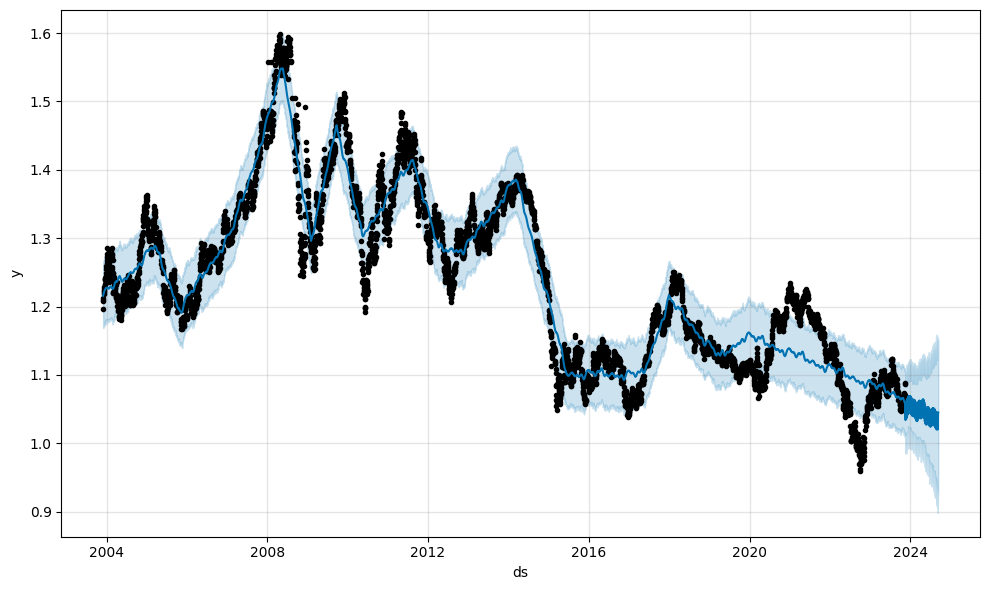

In [39]:
fig = model.plot(prediction)

In [40]:
from prophet.plot import plot_plotly as pp
pp(model, prediction)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2003, 12, 1, 0, 0),
                          datetime.datetime(2003, 12, 2, 0, 0),
                          datetime.datetime(2003, 12, 3, 0, 0), ...,
                          datetime.datetime(2023, 11, 14, 0, 0),
                          datetime.datetime(2023, 11, 15, 0, 0),
                          datetime.datetime(2023, 11, 16, 0, 0)], dtype=object),
              'y': array([1.19650137, 1.20889747, 1.21229756, ..., 1.07018256, 1.0878315 ,
                          1.08707464])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2003, 12, 1, 0, 0),
                          datetime.datetime(2003, 12, 2, 0, 0),
                          datetime.datetime(2003, 12, 3, 0, 0), ...,
                          datetime.datetime(2024, 9, 9, 0, 0),
                          datetime.datetime(2024, 9, 10, 0, 0),
                          datetime.datetime(2024, 9, 11, 0, 0)], dtype=object),
              'y': array([1.16929416, 1.16831928, 1.17160721, ..., 0.92427029, 0.92443713,
                          0.93191663])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2003, 12, 1, 0, 0),
                          datetime.datetime(2003, 12, 2, 0, 0),
                          datetime.datetime(2003, 12, 3, 0, 0), ...,
                          datetime.datetime(2024, 9, 9, 0, 0),
                          datetime.datetime(2024, 9, 10, 0, 0),
                          datetime.datetime(2024, 9, 11, 0, 0)], dtype=object),
              'y': array([1.21574364, 1.21630405, 1.2173815 , ..., 1.04450664, 1.0444428 ,
                          1.04488513])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2003, 12, 1, 0, 0),
                          datetime.datetime(2003, 12, 2, 0, 0),
                          datetime.datetime(2003, 12, 3, 0, 0), ...,
                          datetime.datetime(2024, 9, 9, 0, 0),
                          datetime.datetime(2024, 9, 10, 0, 0),
                          datetime.datetime(2024, 9, 11, 0, 0)], dtype=object),
              'y': array([1.26382639, 1.26379845, 1.26309665, ..., 1.15251907, 1.15061192,
                          1.15061908])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True

c:\Users\SAMBOSS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\SAMBOSS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\SAMBOSS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array

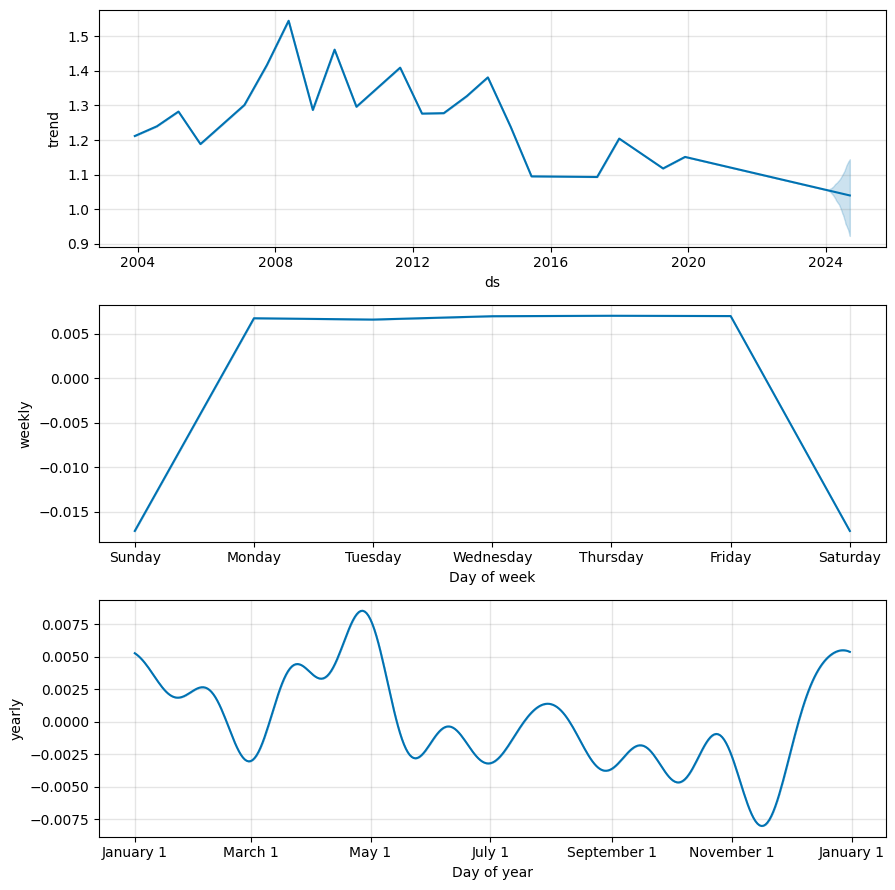

In [41]:
fig2 = model.plot_components(prediction)